In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size = 0.33
)

In [ ]:
N, D  = X_train.shape

In [ ]:
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 2s 65ms/step - loss: 0.9454 - accuracy: 0.3780 - val_loss: 0.8411 - val_accuracy: 0.4415
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.8602 - accuracy: 0.4331 - val_loss: 0.7591 - val_accuracy: 0.5479
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.7798 - accuracy: 0.5039 - val_loss: 0.6898 - val_accuracy: 0.6064
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.7130 - accuracy: 0.5853 - val_loss: 0.6286 - val_accuracy: 0.6596
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6404 - val_loss: 0.5767 - val_accuracy: 0.6968
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6013 - accuracy: 0.6903 - val_loss: 0.5329 - val_accuracy: 0.7394
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 0.5579 - accuracy: 0.7323 - val_loss: 0.4938 - val_accuracy: 0.7713
Epoch 

In [ ]:
print("train score: ", model.evaluate(X_train, y_train))
print("train score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 7ms/step - loss: 0.1021 - accuracy: 0.9764
train score:  [0.10208550095558167, 0.9763779640197754]
6/6 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9681
train score:  [0.10628518462181091, 0.9680851101875305]


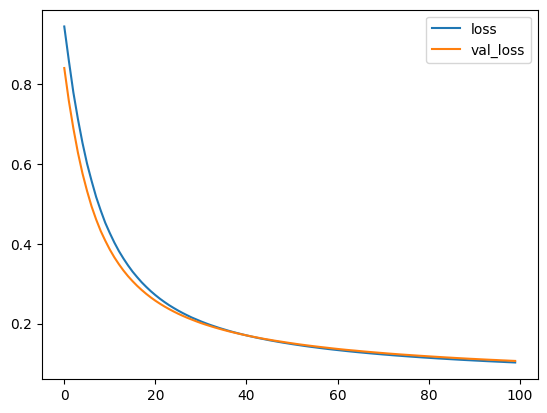

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

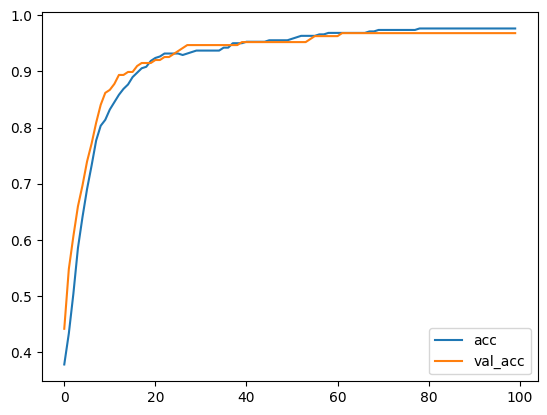

In [ ]:
plt.plot(r.history['accuracy'], label = "acc")
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend();

## Making predictions


In [ ]:
P = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [ ]:
P = np.round(P).flatten()

In [ ]:
print("Manually calculated accuracy: ", np.mean(P==y_test))
print("Evaluate accuracy: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9680851063829787
6/6 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9681
Evaluate accuracy:  [0.10628518462181091, 0.9680851101875305]


## To save the model

In [27]:
model.save("linear-classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
!ls

linear-classification.h5  sample_data


In [30]:
model = tf.keras.models.load_model("linear-classification.h5")
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 7ms/step - loss: 0.1063 - accuracy: 0.9681


[0.10628518462181091, 0.9680851101875305]